# Python Configuration and Data Loading

In [2]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam", "toy"]:
        data = np.load(f"../data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)



loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4171, 32)
training_labels (4171,)

loaded toy data!
test_data (0,)
training_data (1000, 2)
training_labels (1000,)


# Q2: Theory of Hard-Margin Support Vector Machines

My attempted solutions to the question is listed under "/hw1/Hard Margin Support Vector Machines.pdf"

# MNIST Dataset Training and Confusion Matrix

For this dataset I have combined the question 3, question 4, and question 5 into sections of each dataset. It is easier to perform the data partitioning, coding, and hyperparameter tuning by sectioning off each dataset. 

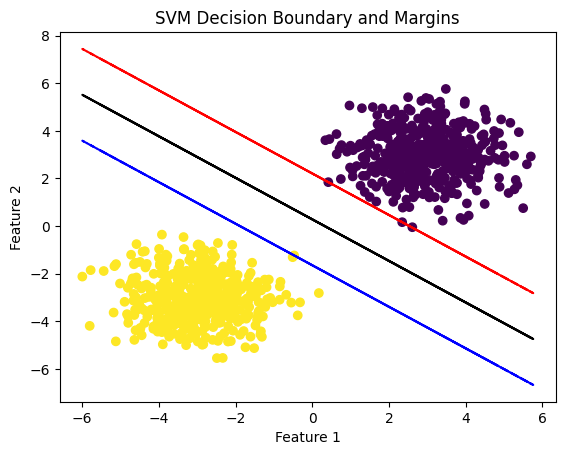

In [3]:
# Plot the initial data
toyData = np.load(f"../data/toy-data.npz")
training_data = toyData["training_data"]
training_labels = toyData["training_labels"]
plt.scatter(training_data[:,0], training_data[:, 1], c=training_labels)
# x = np.linspace(-5,5,100)
w = [-0.4528, -0.5190]
alpha = 0.1471
# y = -(w[0] * x + b) / w[1]
# plt.plot(x,y,'k')

# Plot the margins of the dataset
y_margin_positive = (1-alpha-(w[0] * training_data)) / w[1]
y_margin_negative = (-1-alpha-(w[0] * training_data)) / w[1]
y_margin_boundary = -(w[0] * training_data + alpha) / w[1]

# Plot the graph
plt.plot(training_data, y_margin_boundary, 'k-')
plt.plot(training_data, y_margin_positive, 'b--')
plt.plot(training_data, y_margin_negative, 'r--')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary and Margins")
plt.rcParams['figure.figsize'] = [6,6]
plt.show()


In [4]:
def classification_accuracy(labels, predicted_labels):
    return np.mean(labels == predicted_labels)

Validation Dataset:  (10000, 1, 28, 28)
Training Dataset:  (50000, 1, 28, 28)
Validation Labels:  (10000,)
Training Labels:  (50000,)


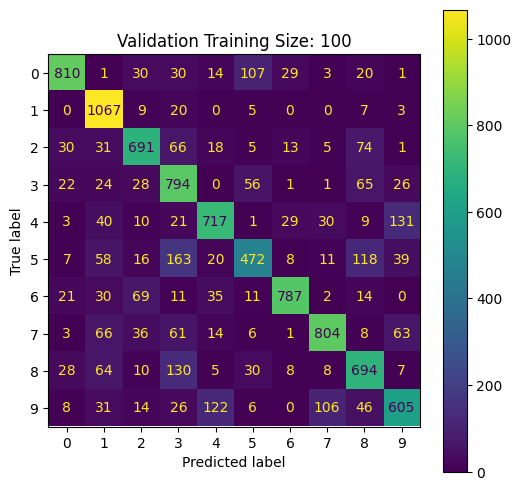

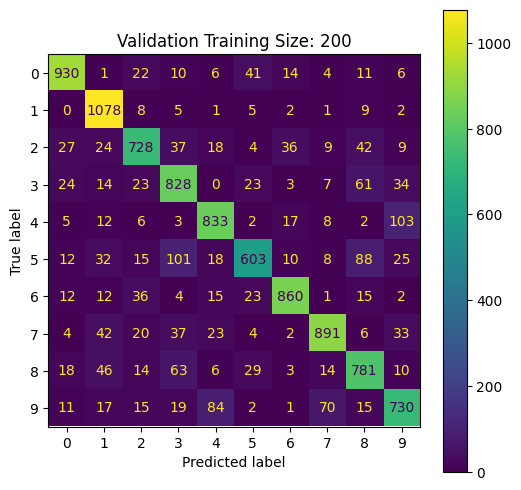

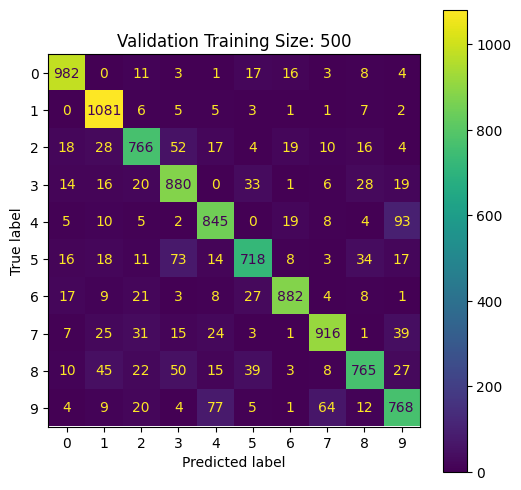

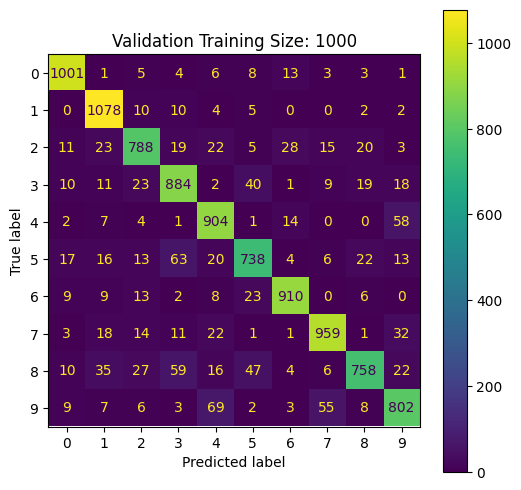

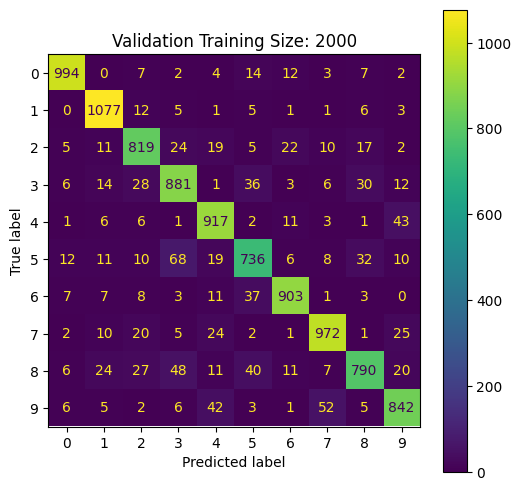

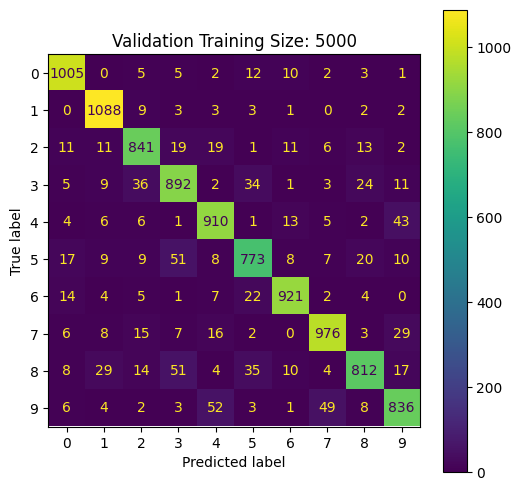

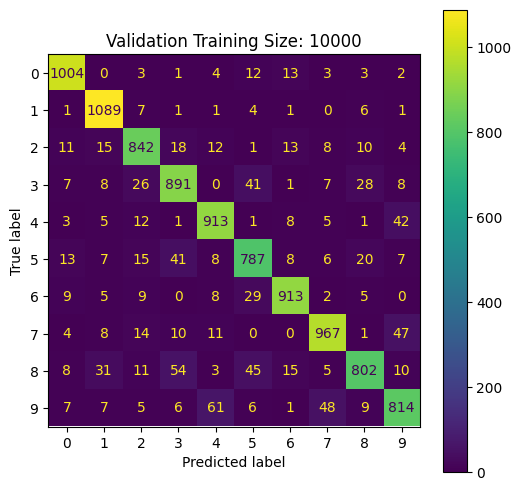

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.7441, 0.8262, 0.8603, 0.8822, 0.8931, 0.9054, 0.9022]


In [5]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Q3#
mnistdata = np.load(f"../data/mnist-data.npz")
training_data = mnistdata["training_data"]
training_labels = mnistdata["training_labels"]

# Shuffle the dataset
np.random.seed(212)
indicies = list(range(training_data.shape[0]))
indicies = np.random.permutation(training_data.shape[0])
shuffled_training_data_2 = training_data[indicies]
shuffled_training_labels_2 = training_labels[indicies]

# Split the dataset
validation_data = shuffled_training_data_2[:10000]
training_data = shuffled_training_data_2[10000:]
validation_label = shuffled_training_labels_2[:10000]
training_label = shuffled_training_labels_2[10000:]

print("Validation Dataset: ", validation_data.shape)
print("Training Dataset: ", training_data.shape)
print("Validation Labels: ", validation_label.shape)
print("Training Labels: ", training_label.shape)


# Training the data set using SKLearn

# Flatten the images for training and test sets
train_data_flattened = training_data.reshape((50000, 28*28))
validation_data_flattened = validation_data.reshape((10000,28*28))

# Train the SVM with the different training size
training_sizes = [100,200,500,1000,2000,5000,10000]
training_accuracies = []
validation_accuracies = []
for sizes in training_sizes:
    # Split the data
    subset_data = train_data_flattened[:sizes]
    subset_labels = training_label[:sizes]

    # Train the model
    # svm_model = LinearSVC(max_iter=10000)
    svm_model = SVC(kernel="linear", C=5, gamma=0.05)
    svm_model.fit(subset_data, subset_labels)

    # Predict on the training set and test data
    training_predictions = svm_model.predict(subset_data)
    validation_predictions = svm_model.predict(validation_data_flattened)
    training_accuracies.append(classification_accuracy(training_predictions, subset_labels))
    validation_accuracies.append(classification_accuracy(validation_predictions, validation_label))

    # Plot the confusion matrix
    cm = confusion_matrix(validation_label, validation_predictions,labels=svm_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
    disp.plot()
    plt.title("Validation Training Size: " + str(sizes))
    plt.show()
    

print(training_accuracies)
print(validation_accuracies)




Text(0, 0.5, 'Accuracy')

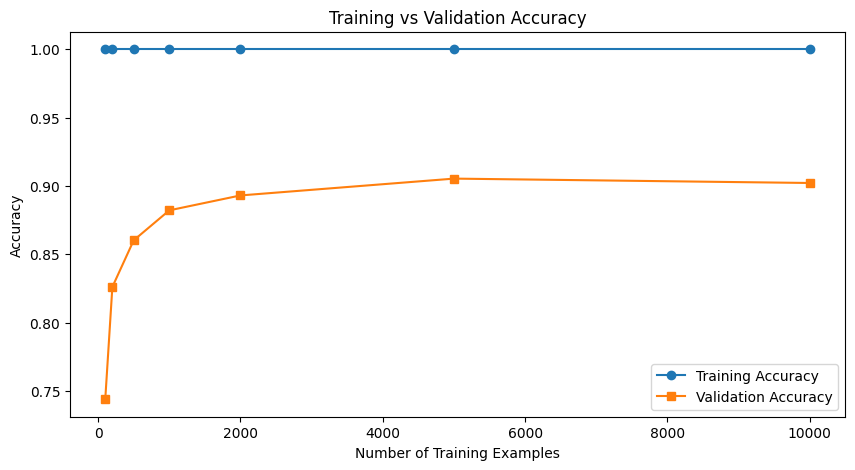

In [6]:
# Plot training accuracies for each dataset
plt.figure(figsize=(10,5))
plt.plot(training_sizes, training_accuracies, marker='o')
plt.plot(training_sizes, validation_accuracies, marker ='s')
plt.legend(("Training Accuracy","Validation Accuracy"))
plt.title("Training vs Validation Accuracy")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")

# Q6: K-Fold Cross Validation

In [7]:
# Finding the best hyperparameter tuning

# TODO: Not sure why trying to tune C parameters on GridSearchCV takes a while. Source: https://stackoverflow.com/questions/72101295/python-gridsearchcv-taking-too-long-to-finish-running
# from sklearn.model_selection import GridSearchCV

# # Train the SVM with the different training size
# param_grid = {
#     'C': [0.1],
#     'gamma': [0.05],
#     'kernel': ['linear']
# }

# grid = GridSearchCV(SVC(), param_grid, refit= True, scoring='accuracy')

# grid.fit(train_data_flattened,training_label)

# print(grid.best_params_)
# print(grid.best_estimator_) 


(1, 28, 28)


Text(0.5, 1.0, '8')

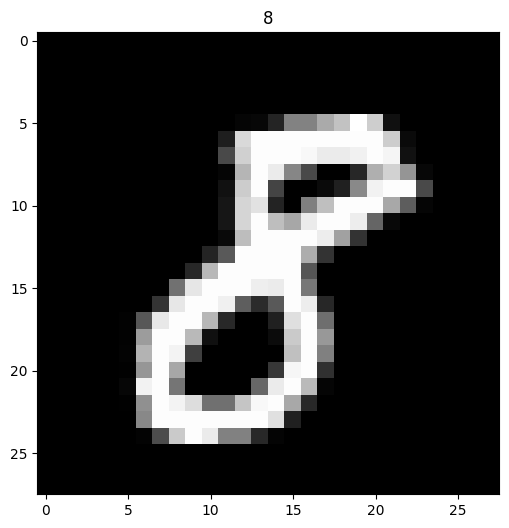

In [8]:
# Plot some of the data samples
print(training_data[0].shape)
plt.imshow(training_data[0].reshape(28,28), cmap="gray")
plt.title(training_label[0])

# Spam Dataset Training and Confusion Matrix

[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 3. 1. 4. 4. 0. 0.]
(834, 32)
(834,)
(3337, 32)
(3337,)


/Users/jasonchen/anaconda3/envs/cs189/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jasonchen/anaconda3/envs/cs189/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jasonchen/anaconda3/envs/cs189/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jasonchen/anaconda3/envs/cs189/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jasonchen/anaconda3/

[0.86, 0.815, 0.828, 0.8, 0.8015, 0.8052142643092598]
[0.7889688249400479, 0.8129496402877698, 0.8201438848920863, 0.8213429256594724, 0.8309352517985612, 0.8249400479616307]


/Users/jasonchen/anaconda3/envs/cs189/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


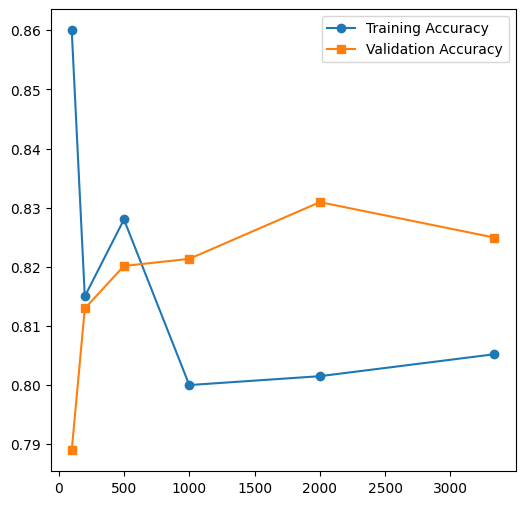

In [9]:
spamdata = np.load(f"../data/spam-data.npz")
training_data = spamdata["training_data"]
training_label = spamdata["training_labels"]
print(training_data[0])
# Shuffle the data
np.random.seed(212)
indicies = np.random.permutation(training_data.shape[0])
shuffled_training_data = training_data[indicies]
shuffled_training_label = training_label[indicies]

# Split the Dataset
validationlength = int(training_data.shape[0]/5)
split_shuffled_validation_data = shuffled_training_data[:validationlength]
split_shuffled_validation_label = shuffled_training_label[:validationlength]
split_shuffled_training_data = shuffled_training_data[validationlength:]
split_shuffled_training_label = shuffled_training_label[validationlength:]

print(split_shuffled_validation_data.shape)
print(split_shuffled_validation_label.shape)
print(split_shuffled_training_data.shape)
print(split_shuffled_training_label.shape)

training_sizes = [100, 200, 500, 1000, 2000, len(split_shuffled_training_data)]
training_accuracies = []
validation_accuracies = []
for size in training_sizes:
    subset_data = split_shuffled_training_data[:size]
    subset_label = split_shuffled_training_label[:size]

    svm_model = LinearSVC(max_iter=5000)
    svm_model.fit(subset_data, subset_label)

    training_predictions = svm_model.predict(subset_data)
    validation_predictions = svm_model.predict(split_shuffled_validation_data)

    training_accuracies.append(classification_accuracy(training_predictions, subset_label))
    validation_accuracies.append(classification_accuracy(validation_predictions, split_shuffled_validation_label))

print(training_accuracies)
print(validation_accuracies)

plt.plot(training_sizes, training_accuracies, marker='o')
plt.plot(training_sizes, validation_accuracies, marker='s')
plt.legend(("Training Accuracy", "Validation Accuracy"))
